# Abstract

This notebook details the steps we took to find the correct model for the kaggle data contest. The notebook is split into the following sessions:

1. Familiarizing myself with the data : Where we do simple data visualizations and summaries to understand the issues with the data (or lack thereof)

2. Oversampling the data : Where we use different methods to resolve the issue that class 0 has much more data points than class 1. Things that we have tried include:
    1. imblearn python library with functions supporting oversampling and undersampling techniques

3. Reducing Dimensionality : Reduce the number of dimensions in the data. Things we have tried include
    1. PCA library
    
4. Classification Algorithm : Where we test out different classification algorithm. Things we have tried include
    1. SVM with GridSearch Algorithm
    
TODO : 
- Implement cross-validation
- Try different kernels in SVM and find the best one

# Familiarize myself with the data

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt

In [2]:
result = pd.read_csv("submit.csv",header=None)

In [3]:
result.head(10)

,0,1
0,Ids,Predictions
1,1,-0.3757
2,2,-0.47766
3,3,-0.57434
4,4,-0.91493
5,5,-1.0782
6,6,-0.15605
7,7,0.17421
8,8,-0.49312
9,9,-0.63697


In [4]:
data = pd.read_csv("test.csv",header=None) # dataframe for data
label = pd.read_csv("trainlabels.csv",header=None) # dataframe for labels

In [5]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,...,107,108,109,110,111,112,113,114,115,116
count,51147.000000,51147.000000,51147.000000,51147.000000,51147.000000,51147.000000,51147.000000,51147.000000,51147.000000,51147.000000,...,51147.000000,51147.000000,51147.000000,51147.000000,51147.000000,51147.000000,51147.000000,51147.000000,51147.000000,51147.000000
mean,0.004512,-0.000636,0.051673,0.042571,0.056183,0.057739,0.008261,0.004428,-0.010737,-0.009185,...,0.002301,-0.008224,-0.001064,-0.002064,0.005197,0.007201,0.011304,0.004175,0.011035,-0.004051
std,0.169657,1.214338,1.140387,1.163355,0.959239,0.981403,1.000048,0.998387,0.970957,0.974807,...,0.995252,0.982820,1.005206,1.007926,0.988943,1.003673,0.988229,1.000503,0.989728,1.000156
min,-14.729000,-147.050000,-71.355000,-81.417000,-3.083900,-9.116000,-2.074000,-1.907100,-1.572300,-1.504400,...,-1.936300,-7.444100,-7.460500,-32.916000,-7.777900,-1.217500,-4.532000,-5.448400,-6.183800,-23.222000
25%,-0.060565,-0.033402,-0.149330,-0.124350,-0.459645,-0.446405,-0.516745,-0.588935,-0.713190,-0.726980,...,-0.636215,-0.460810,-0.491925,-0.348060,-0.508015,-0.844615,-0.233770,-0.593415,-0.089995,-0.258950
50%,0.024372,0.106880,0.148950,0.132410,-0.064171,-0.062274,0.019582,-0.075740,-0.231750,-0.239930,...,-0.064278,-0.106220,0.161080,0.196700,-0.262700,-0.120030,0.327120,0.274870,0.329680,-0.143200
75%,0.091942,0.174370,0.379030,0.329570,0.442510,0.428840,0.580480,0.510490,0.476545,0.485730,...,0.553515,0.313420,0.563285,0.398780,0.131030,0.656475,0.648445,0.807115,0.587350,0.005410
max,1.342600,5.426700,2.032300,1.747900,44.441000,32.837000,15.233000,12.563000,15.629000,11.644000,...,13.878000,11.096000,6.313700,17.026000,11.566000,16.913000,1.410600,1.438700,1.358900,40.554000


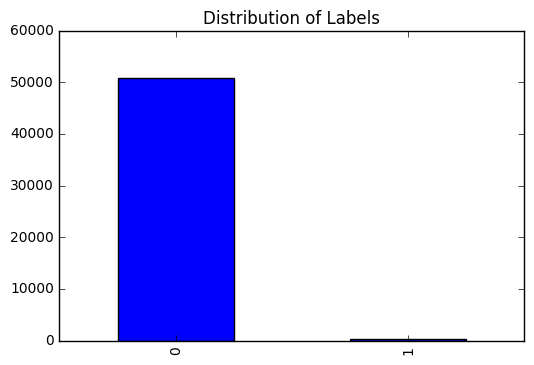

In [6]:
label_general = label[0].value_counts()
label_general.plot(kind='bar',title='Distribution of Labels')

In [7]:
label_general

0    50747
1      400
Name: 0, dtype: int64

Alright it looks like there number of 0s far exceed that of 1, we gotta do something about this...

/home/sogun3/.local/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  if __name__ == '__main__':


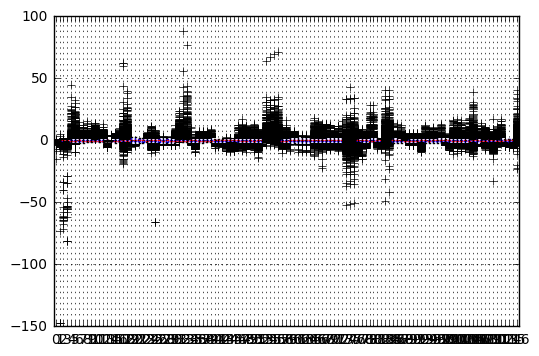

In [8]:
data.boxplot();

In [16]:
from sklearn.preprocessing import MinMaxScaler

mmscaler = MinMaxScaler()
mmscaler_scaled = mmscaler.fit_transform(data)

There's two things we need to do before passing the data through statistical learning algorithms
1. Increase the number of data points for 1
2. Reduce the dimensionality of features, choose only the ones that matter

# Oversampling minority data

One common example of increasing the number of minority data is SMOTE, which stands for Synthetic Minority Oversampling TEchnique. This technique 

Note : k nearest neighbour algorithm, random forest
Note : should test whether to implement the technique before or after reducing the dimensionality, since research (https://bmcbioinformatics.biomedcentral.com/articles/10.1186/1471-2105-14-106) showed that SMOTE does not work well in low dimension data set

F1 scoring? ROC based learning

Note : I got how to do PCA from Python Data Science Essentials book by Boschetti

In [9]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(kind='svm')
data_resampled, label_resampled = sm.fit_sample(data,label.as_matrix())

/home/sogun3/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [10]:
import collections
collections.Counter(label_resampled)

Counter({0: 50747, 1: 16022})

Aha we successfully increase the number of 1s to 1/5 the number of 0s, which is a great improvement! Now we finished preparing the data, we can now do SVM! Woo!

# Reduce dimensionality

A common method to reduce dimensionality is with PCA. The user can determine the number of components he or she wants to reduce to, and PCA would do it for you. One important parameter to look for is explained variance ratio, which is a variable that indicates how much variance is explained by each of the selected ratio. The maximum sum of explained variance ratio can be up to 1, where all variance is explained, and down to 0, where no variance is explained. 

In [11]:
from sklearn.decomposition import PCA   
pca = PCA(n_components=2)
X_pca_2c=pca.fit_transform(data)
X_pca_2c.shape

(51147, 2)

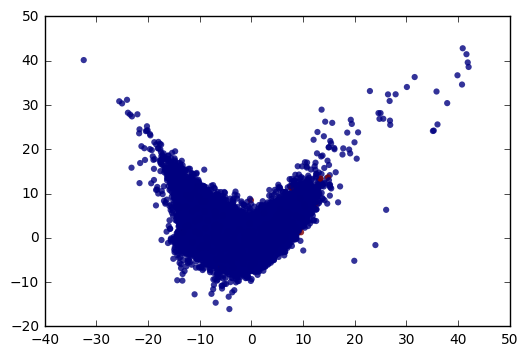

0.38320273625976942

In [12]:
plt.scatter(X_pca_2c[:,0],X_pca_2c[:,1],c=label,alpha=0.8,edgecolors='none')
plt.show()
pca.explained_variance_ratio_.sum()

Great! We successfully implemented PCA to reduce the dimensionality to 2D. however, the graph is very problematic. First of all, you can barely see the class 1 features, which are the red dots. It implies that the labels are still not well separated. It could be because of the imbalanced data, but the red dots are still muddled. Moreover, the variance ratio is only 38%. 

In [13]:
from sklearn.decomposition import PCA             # 1. Choose model
def pca_optimum(dataset, labelset,iterations):
    y = []  # save variance ratio for plotting
    x = []  # save num of iterations for plotting
    for i in range(1,iterations+1):
        pca = PCA(n_components=i)                 # 2. Instantiate model
        X_pca_2c=pca.fit_transform(dataset)       # 3. fit model to data
        y_i = pca.explained_variance_ratio_.sum() # 4. Obtain variance
        print i, y_i                              # 5. visually obtain data points   
        x.append(i)                               # 6. add iteration to x array
        y.append(y_i)                             # 7. add variance ratio to y array
    plt.plot(x,y)                                 # 8. Plot graph
    plt.title("Number of features to contain in PCA analysis")
    plt.xlabel("Number of labels")
    plt.ylabel("Amount of energy (%)")
    plt.figure()

1 0.270629225211
2 0.391418569648
3 0.468730359486
4 0.536184277338
5 0.58212191627
6 0.623263821627
7 0.654581153947
8 0.682086519623
9 0.7028009924
10 0.72157644482
11 0.739393717902
12 0.756300619186
13 0.772643886929
14 0.7879213234
15 0.801688043643
16 0.814985809122
17 0.826634893017
18 0.837877486131
19 0.848520641372
20 0.858703492468
21 0.868627749745
22 0.877408921963
23 0.885697408819
24 0.893587188777
25 0.900986069913
26 0.907474813913
27 0.913358651405
28 0.919102542273
29 0.924417569044
30 0.929388097796
31 0.933988869078
32 0.938157192714
33 0.942059548885
34 0.945926821568
35 0.949214168551
36 0.952455943401
37 0.955570464485
38 0.958631431916
39 0.961502171532
40 0.96426700657
41 0.966769334294
42 0.969123520293
43 0.971329860743
44 0.973349131738
45 0.975210246793
46 0.977016527871
47 0.978686803479
48 0.980349739212
49 0.981962552195
50 0.983428679051


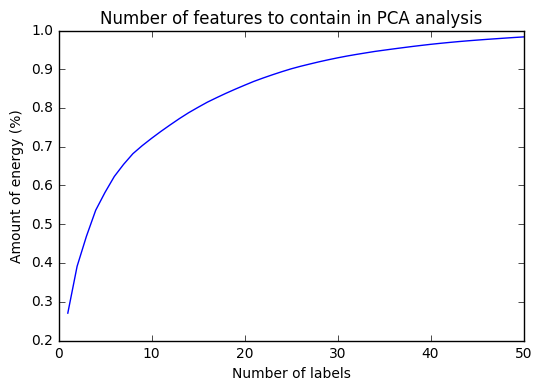

In [14]:
pca_optimum(data_resampled, label_resampled,50)

From the data collected, the cutoff number of features should be at around 37 features, which is much more manageable than 117 features. However, I would want to validate this method with other feature reduction methods. 

In [15]:
pca_37 = PCA(n_components=36)
X_pca_37=pca_37.fit_transform(data_resampled)
pca_37.get_params()
X_pca_37.shape

(66769, 36)

# Final Algorithm

## Organize and oversample data

In [2]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn import cross_validation
from imblearn.over_sampling import SMOTE

data = pd.read_csv("test.csv",header=None) # dataframe for data
label = pd.read_csv("trainlabels.csv",header=None) # dataframe for labels


sm = SMOTE(kind='svm')
data_resampled, label_resampled = sm.fit_sample(data,label.as_matrix())
X_train, X_test, y_train, y_test = cross_validation.train_test_split(data_resampled, label_resampled, test_size=0.4, random_state=0)


/home/sogun3/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Perform PCA

In [12]:
pca_36 = PCA(n_components=36)
pca_36.fit(X_train)

X_t_train = pca_36.transform(X_train)
X_t_test = pca_36.transform(X_test)

In [13]:
X_t_test.shape

(32243, 36)

In [14]:
clf = SVC()
clf.fit(X_t_train, y_train)
print 'score', clf.score(X_t_test, y_test)
print 'pred label', clf.predict(X_t_test)

score 0.995782030208
pred label [0 0 1 ..., 1 0 0]


In [8]:
clf.decision_function(X_t_test)

array([-1.78789603, -1.90461712,  1.01749606, ...,  1.01508986,
       -2.79945289, -1.64379005])

In [21]:
tester = pd.read_csv("test.csv",header=None)
X_t_tester = pca_36.transform(tester)
res = clf.decision_function(X_t_tester);

In [22]:
X_t_tester.shape

(51147, 36)

In [26]:
res.min()

-3.9521186685399692

In [40]:
import numpy as np
ids = np.array(np.arange(1,res.shape[0]+1))
d = {'Id':ids, 'Prediction':res}
df = pd.DataFrame(data=d)
df.head(10)
df.to_csv(path_or_buf="submit_anaconda.csv",index=False)

In [41]:
df.head(10)

,Id,Prediction
0,1,-1.700993
1,2,-1.631949
2,3,-1.771376
3,4,-1.944987
4,5,-2.724440
5,6,-2.612989
6,7,-0.613615
7,8,-2.420370
8,9,-2.187510
9,10,-1.300174


In [43]:
check = pd.read_csv("submit_anaconda.csv")
check.shape

(51147, 2)

In [24]:
data = pd.read_csv("submit.csv") # dataframe for data
data.head(10)

,Id,Prediction
0,1,-0.37570
1,2,-0.47766
2,3,-0.57434
3,4,-0.91493
4,5,-1.07820
5,6,-0.15605
6,7,0.17421
7,8,-0.49312
8,9,-0.63697
9,10,-1.75010
